# Step 2 - Thực hiện phân tích dữ liệu - Data analysis
- Đã thực processing dữ liệu ra bộ dữ liệu mới
- Thực hiện lại các bước cần thiết trong data analysis
1. Import thư viện
2. Summary pre-processing
3. Data exploration
4. Data analysis 

## A. Import thư viện

In [1]:
# 1. Import library
import lib.step1ml_utilis_summaryPre_processing as pre
import lib.step2ml_utils_feature_selection as fea
import lib.step3ml_utils_model_design_testing_regression as reg
import lib.step4ml_utils_model_design_testing_explainability as exp
import lib.step5ml_utils_model_design_testing_visualize_models as vis
import lib.step6ml_utils_model_design_testing_geospatial_analysis as geo
import lib.step9ml_Text_Kmeans_Clustering as clu
import matplotlib
import matplotlib_inline
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## B. Summary pre-processing

### 1.1. Overview dữ liệu

In [2]:
import pandas as pd
dir_file = "data_analysis/online_retail_preprocessing.csv"
df = pd.read_csv(dir_file)

In [3]:
df.head(5)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,fea_invoice_no,...,fea_quantity,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_unit_price,fea_customer_id,fea_country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.00,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,536365,...,6.00,2010-01-12 08:26:00,2010,1,12,2,1,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6.00,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,536365,...,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.00,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,536365,...,8.00,2010-01-12 08:26:00,2010,1,12,2,1,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.00,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,536365,...,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.00,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,536365,...,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom


In [4]:
df.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'fea_invoice_no',
       'fea_type_invoice', 'fea_stock_code', 'fea_type_stock_code',
       'fea_description_1', 'fea_description_2', 'fea_description_3',
       'fea_quantity', 'fea_invoice_date', 'fea_year', 'fea_month', 'fea_day',
       'fea_weekofyear', 'fea_daily', 'fea_unit_price', 'fea_customer_id',
       'fea_country'],
      dtype='object')

 Categerocial   Numerical   NaN 


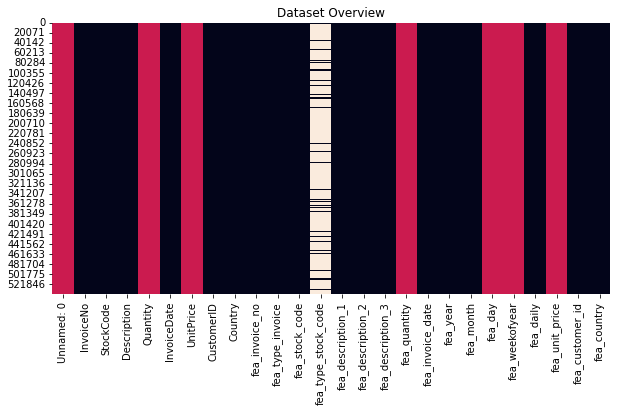

(Text(0.5, 1.0, 'Dataset Overview'), None)

In [5]:
# Xem lại dữ liệu sắp xếp là category hay continious
pre.df_overview(df=df, choose="visualization")

In [6]:
# Xem lại dữ liệu sắp xếp là category hay continious
pre.df_overview(df=df, choose="dataframe", columns=['Feature', 'Type_Feature', 'NAS', 'Check_data', 'check'])

Shape: (541909, 26)
-----------------


,Feature,Type_Feature,NAS,Check_data,check
0,Unnamed: 0,Continious,Nas: 0(0%),Min-Max: (0)-(541908),Possible check
1,InvoiceNo,categorical,Nas: 0(0%),Categories: 25900,None
2,StockCode,categorical,Nas: 0(0%),Categories: 4070,None
3,Description,categorical,Nas: 0(0%),Categories: 4224,None
4,Quantity,Continious,Nas: 0(0%),Min-Max: (-80995)-(80995),None
5,InvoiceDate,categorical,Nas: 0(0%),Categories: 23260,None
6,UnitPrice,Continious,Nas: 0(0%),Min-Max: (-11062)-(38970),None
7,CustomerID,categorical,Nas: 0(0%),Categories: 4373,None
8,Country,categorical,Nas: 0(0%),Categories: 38,None
9,fea_invoice_no,categorical,Nas: 0(0%),Categories: 25900,None


### Nhận xét:
- Dữ liệu nan hoặc null: có với biến fea_type_stock_code, fea_description_2, fea_description_3
- Type
    1. Chỉnh lại các thuộc tính đúng về dữ liệu mong muốn
- Thêm 1 số thuộc tính: 
    1. Doanh thu  = fea_quantity * fea_unit_price

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           541909 non-null  int64  
 1   InvoiceNo            541909 non-null  object 
 2   StockCode            541909 non-null  object 
 3   Description          541909 non-null  object 
 4   Quantity             541909 non-null  float64
 5   InvoiceDate          541909 non-null  object 
 6   UnitPrice            541909 non-null  float64
 7   CustomerID           541909 non-null  object 
 8   Country              541909 non-null  object 
 9   fea_invoice_no       541909 non-null  object 
 10  fea_type_invoice     541909 non-null  object 
 11  fea_stock_code       541909 non-null  object 
 12  fea_type_stock_code  54873 non-null   object 
 13  fea_description_1    541909 non-null  object 
 14  fea_description_2    541854 non-null  object 
 15  fea_description_3

### 1.2. Processing_nan_null_change_type

#### 1.2.1. Change type

In [8]:
# Chuyển kiểu dữ liệu cho thuộc tính
# Chuyển đổi dữ liệu date
lst_float = ['Quantity','UnitPrice','fea_quantity', 'fea_unit_price']
lst_int = ['Unnamed: 0', 'fea_year', 'fea_month', 'fea_day','fea_weekofyear', 'fea_daily']
lst_object = ['InvoiceNo','StockCode','Description','CustomerID','Country','fea_invoice_no', 'fea_type_invoice', 'fea_stock_code', 'fea_description_1', 'fea_description_2', 'fea_description_3', 'fea_customer_id', 'fea_country']

lst_date1 = 'InvoiceDate'
lst_date2 = 'fea_invoice_date'

In [9]:
pre.change_type_lst(df=df, lst_change=lst_float, choose='float')

In [10]:
pre.change_type_lst(df=df, lst_change=lst_int, choose='int')

In [11]:
pre.changeToAstype_date(df=df, feature_date=lst_date1)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,fea_invoice_no,...,fea_quantity,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_unit_price,fea_customer_id,fea_country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.00,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,536365,...,6.00,2010-01-12 08:26:00,2010,1,12,2,1,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6.00,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,536365,...,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.00,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,536365,...,8.00,2010-01-12 08:26:00,2010,1,12,2,1,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.00,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,536365,...,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.00,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,536365,...,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.00,2011-09-12 12:50:00,0.85,12680.0,France,581587,...,12.00,2011-09-12 12:50:00,2011,9,12,37,0,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.00,2011-09-12 12:50:00,2.10,12680.0,France,581587,...,6.00,2011-09-12 12:50:00,2011,9,12,37,0,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.00,2011-09-12 12:50:00,4.15,12680.0,France,581587,...,4.00,2011-09-12 12:50:00,2011,9,12,37,0,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.00,2011-09-12 12:50:00,4.15,12680.0,France,581587,...,4.00,2011-09-12 12:50:00,2011,9,12,37,0,4.15,12680.0,France


In [12]:
pre.changeToAstype_date(df=df, feature_date=lst_date2)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,fea_invoice_no,...,fea_quantity,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_unit_price,fea_customer_id,fea_country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.00,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,536365,...,6.00,2010-01-12 08:26:00,2010,1,12,2,1,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6.00,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,536365,...,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.00,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,536365,...,8.00,2010-01-12 08:26:00,2010,1,12,2,1,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.00,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,536365,...,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.00,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,536365,...,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.00,2011-09-12 12:50:00,0.85,12680.0,France,581587,...,12.00,2011-09-12 12:50:00,2011,9,12,37,0,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.00,2011-09-12 12:50:00,2.10,12680.0,France,581587,...,6.00,2011-09-12 12:50:00,2011,9,12,37,0,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.00,2011-09-12 12:50:00,4.15,12680.0,France,581587,...,4.00,2011-09-12 12:50:00,2011,9,12,37,0,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.00,2011-09-12 12:50:00,4.15,12680.0,France,581587,...,4.00,2011-09-12 12:50:00,2011,9,12,37,0,4.15,12680.0,France


In [13]:
pre.startInformation(df=df, choose='info')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           541909 non-null  int32         
 1   InvoiceNo            541909 non-null  object        
 2   StockCode            541909 non-null  object        
 3   Description          541909 non-null  object        
 4   Quantity             541909 non-null  float64       
 5   InvoiceDate          541909 non-null  datetime64[ns]
 6   UnitPrice            541909 non-null  float64       
 7   CustomerID           541909 non-null  object        
 8   Country              541909 non-null  object        
 9   fea_invoice_no       541909 non-null  object        
 10  fea_type_invoice     541909 non-null  object        
 11  fea_stock_code       541909 non-null  object        
 12  fea_type_stock_code  54873 non-null   object        
 13  fea_descriptio

#### 1.2.2. Xóa dòng không cần thiết

In [14]:
# 1. Xóa dữ cột không cần thiết
lst_drop = ['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
data_pre_processing = df.drop(lst_drop, axis=1)
data_pre_processing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fea_invoice_no       541909 non-null  object        
 1   fea_type_invoice     541909 non-null  object        
 2   fea_stock_code       541909 non-null  object        
 3   fea_type_stock_code  54873 non-null   object        
 4   fea_description_1    541909 non-null  object        
 5   fea_description_2    541854 non-null  object        
 6   fea_description_3    541853 non-null  object        
 7   fea_quantity         541909 non-null  float64       
 8   fea_invoice_date     541909 non-null  datetime64[ns]
 9   fea_year             541909 non-null  int32         
 10  fea_month            541909 non-null  int32         
 11  fea_day              541909 non-null  int32         
 12  fea_weekofyear       541909 non-null  int32         
 13  fea_daily     

In [15]:
data_pre_processing.columns

Index(['fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2',
       'fea_description_3', 'fea_quantity', 'fea_invoice_date', 'fea_year',
       'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily', 'fea_unit_price',
       'fea_customer_id', 'fea_country'],
      dtype='object')

### 1.3. Thêm thuộc tính cho dữ liệu
1. Doanh thu  = fea_quantity * fea_unit_price

#### 1.3.1. Xem dữ liệu trong các thuộc tính phân loại

In [16]:
data_pre_processing.columns

Index(['fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2',
       'fea_description_3', 'fea_quantity', 'fea_invoice_date', 'fea_year',
       'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily', 'fea_unit_price',
       'fea_customer_id', 'fea_country'],
      dtype='object')

In [17]:
lst_categorical = ['fea_type_invoice', 'fea_country']
pre.categorical_value_counts_count(df=data_pre_processing, lst_categorical_choose=lst_categorical)

close


{'fea_type_invoice': ['Returns', 'sales'],
 'fea_country': ['Australia',
  'Austria',
  'Bahrain',
  'Belgium',
  'Brazil',
  'Canada',
  'Channel Islands',
  'Cyprus',
  'Czech Republic',
  'Denmark',
  'EIRE',
  'European Community',
  'Finland',
  'France',
  'Germany',
  'Greece',
  'Hong Kong',
  'Iceland',
  'Israel',
  'Italy',
  'Japan',
  'Lebanon',
  'Lithuania',
  'Malta',
  'Netherlands',
  'Norway',
  'Poland',
  'Portugal',
  'RSA',
  'Saudi Arabia',
  'Singapore',
  'Spain',
  'Sweden',
  'Switzerland',
  'USA',
  'United Arab Emirates',
  'United Kingdom',
  'Unspecified']}

#### Nhận xét:
- Bài toán không có thuộc tính đơn vị


#### 1.3.2. Thêm thuộc tính cho bài toán
1. Doanh thu  = fea_quantity * fea_unit_price

In [18]:
# . Total_volumn_item = fea_item_4046 + fea_item_4225 + fea_item_4770
data_pre_processing['fea_revenue'] = data_pre_processing['fea_quantity'] * data_pre_processing['fea_unit_price']
data_pre_processing.head(5)

,fea_invoice_no,fea_type_invoice,fea_stock_code,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_unit_price,fea_customer_id,fea_country,fea_revenue
0,536365,sales,85123A,a,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart tlight holder,white hanging heart tlight holder,6.00,2010-01-12 08:26:00,2010,1,12,2,1,2.55,17850.0,United Kingdom,15.30
1,536365,sales,71053,NaN,WHITE METAL LANTERN,white metal lantern,white metal lantern,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom,20.34
2,536365,sales,84406B,b,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger,cream cupid hearts coat hanger,8.00,2010-01-12 08:26:00,2010,1,12,2,1,2.75,17850.0,United Kingdom,22.00
3,536365,sales,84029G,g,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle,knitted union flag hot water bottle,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom,20.34
4,536365,sales,84029E,e,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart,red woolly hottie white heart,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom,20.34


In [19]:
# Xem lại dữ liệu sắp xếp là category hay continious
test_df = data_pre_processing.drop(columns=['fea_invoice_date'])
test_df
pre.df_overview(df=test_df, choose="dataframe", columns = ['Feature', 'Type_Feature', 'NAS', 'Check_data'])

Shape: (541909, 17)
-----------------


,Feature,Type_Feature,NAS,Check_data
0,fea_invoice_no,categorical,Nas: 0(0%),Categories: 25900
1,fea_type_invoice,categorical,Nas: 0(0%),Categories: 2
2,fea_stock_code,categorical,Nas: 0(0%),Categories: 4070
3,fea_type_stock_code,categorical,Nas: 487036(89%),Categories: 38
4,fea_description_1,categorical,Nas: 0(0%),Categories: 4224
5,fea_description_2,categorical,Nas: 55(0%),Categories: 4159
6,fea_description_3,categorical,Nas: 56(0%),Categories: 4084
7,fea_quantity,Continious,Nas: 0(0%),Min-Max: (-80995)-(80995)
8,fea_year,categorical,Nas: 0(0%),Categories: 2
9,fea_month,categorical,Nas: 0(0%),Categories: 12


#### Nhận xét: 
1. Những việc đã làm: 
    - Dữ liệu null ở các thuộc tính fea_type_stock_code, fea_description_2, fea_description_3
    - Thêm thuộc tính: fea_revenue
2. Việc cần làm khám phá dữ liệu - data exploration
    - Khám phá dữ liệu
    - Tìm hiểu thuộc tính total volumn khác gì với total item là gì ?
    - Một số việc chưa làm
        - Làm thế nào để xác định tháng có lượng bơ cao nhất và lượng túi bán ra nhiều nhất cao nhất?
        - Phân khúc bán hàng nhiều nhật tại vùng theo từng loại
        - Khoảng giá trung bình cho các item hoặc theo region

#### 1.3.3. Thay thế dữ liệu NAN và Null => other

In [20]:
# Dữ liệu null/nan thay thế giá other
lst_continuous = ['fea_type_stock_code', 'fea_description_2', 'fea_description_3']
data_pre_processing = pre.changeMisingValueContinuous(df=data_pre_processing, choose='other', lst_continuous=lst_continuous)
data_pre_processing

close


,fea_invoice_no,fea_type_invoice,fea_stock_code,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_unit_price,fea_customer_id,fea_country,fea_revenue
0,536365,sales,85123A,a,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart tlight holder,white hanging heart tlight holder,6.00,2010-01-12 08:26:00,2010,1,12,2,1,2.55,17850.0,United Kingdom,15.30
1,536365,sales,71053,other,WHITE METAL LANTERN,white metal lantern,white metal lantern,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom,20.34
2,536365,sales,84406B,b,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger,cream cupid hearts coat hanger,8.00,2010-01-12 08:26:00,2010,1,12,2,1,2.75,17850.0,United Kingdom,22.00
3,536365,sales,84029G,g,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle,knitted union flag hot water bottle,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom,20.34
4,536365,sales,84029E,e,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart,red woolly hottie white heart,6.00,2010-01-12 08:26:00,2010,1,12,2,1,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,sales,22613,other,PACK OF 20 SPACEBOY NAPKINS,pack of 2 spaceboy napkins,pack of spaceboy napkins,12.00,2011-09-12 12:50:00,2011,9,12,37,0,0.85,12680.0,France,10.20
541905,581587,sales,22899,other,CHILDREN'S APRON DOLLY GIRL,childrens apron dolly girl,childrens apron dolly girl,6.00,2011-09-12 12:50:00,2011,9,12,37,0,2.10,12680.0,France,12.60
541906,581587,sales,23254,other,CHILDRENS CUTLERY DOLLY GIRL,childrens cutlery dolly girl,childrens cutlery dolly girl,4.00,2011-09-12 12:50:00,2011,9,12,37,0,4.15,12680.0,France,16.60
541907,581587,sales,23255,other,CHILDRENS CUTLERY CIRCUS PARADE,childrens cutlery circus parade,childrens cutlery circus parade,4.00,2011-09-12 12:50:00,2011,9,12,37,0,4.15,12680.0,France,16.60


In [21]:
# Xem lại dữ liệu sắp xếp là category hay continious
test_df = data_pre_processing.drop(columns=['fea_invoice_date'])
test_df
pre.df_overview(df=test_df, choose="dataframe", columns = ['Feature', 'Type_Feature', 'NAS', 'Check_data'])

Shape: (541909, 17)
-----------------


,Feature,Type_Feature,NAS,Check_data
0,fea_invoice_no,categorical,Nas: 0(0%),Categories: 25900
1,fea_type_invoice,categorical,Nas: 0(0%),Categories: 2
2,fea_stock_code,categorical,Nas: 0(0%),Categories: 4070
3,fea_type_stock_code,categorical,Nas: 0(0%),Categories: 39
4,fea_description_1,categorical,Nas: 0(0%),Categories: 4224
5,fea_description_2,categorical,Nas: 0(0%),Categories: 4159
6,fea_description_3,categorical,Nas: 0(0%),Categories: 4084
7,fea_quantity,Continious,Nas: 0(0%),Min-Max: (-80995)-(80995)
8,fea_year,categorical,Nas: 0(0%),Categories: 2
9,fea_month,categorical,Nas: 0(0%),Categories: 12


#### Nhận xét:
- Thực tế chỉ có 25.900 hóa đơn, có 2 loại giao dịch bán hàng hoặc khuyến mãi, discount, cancel...
- Stock_type: Thể hiện giao dịch xuất khoa và có 39 nhãn khác nhau nhưng trong đó other là nhiều nhất
- Khách hàng thì có 4373 khách hàng trong đó có 1 khách hàng other

#### 1.3.4. Sắp xếp lại dữ liệu

In [22]:
data_pre_processing.columns

Index(['fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2',
       'fea_description_3', 'fea_quantity', 'fea_invoice_date', 'fea_year',
       'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily', 'fea_unit_price',
       'fea_customer_id', 'fea_country', 'fea_revenue'],
      dtype='object')

In [23]:
lst_sort = ['fea_invoice_date', 'fea_year','fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily', 'fea_customer_id', 'fea_country','fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2','fea_description_3', 'fea_quantity', 'fea_unit_price', 'fea_revenue' ]
data_pre_processing = data_pre_processing[lst_sort]
data_pre_processing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fea_invoice_date     541909 non-null  datetime64[ns]
 1   fea_year             541909 non-null  int32         
 2   fea_month            541909 non-null  int32         
 3   fea_day              541909 non-null  int32         
 4   fea_weekofyear       541909 non-null  int32         
 5   fea_daily            541909 non-null  int32         
 6   fea_customer_id      541909 non-null  object        
 7   fea_country          541909 non-null  object        
 8   fea_invoice_no       541909 non-null  object        
 9   fea_type_invoice     541909 non-null  object        
 10  fea_stock_code       541909 non-null  object        
 11  fea_type_stock_code  541909 non-null  object        
 12  fea_description_1    541909 non-null  object        
 13  fea_descriptio

#### 1.3.5. Delete duplicates

In [24]:
# Xem tỉ lệ dữ liệu duplicate => Đưa ra quyết định hoặc tìm hiểu vì sao dữ liệu bị lỗi
pre.percentDuplicates(df=data_pre_processing)

close


0.00972

In [25]:
# Xóa dữ liệu double
data_pre_processing = pre.deleteDuplicates(df=data_pre_processing)
pre.percentDuplicates(df=data_pre_processing)

close
close


0

In [26]:
data_pre_processing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fea_invoice_date     536641 non-null  datetime64[ns]
 1   fea_year             536641 non-null  int32         
 2   fea_month            536641 non-null  int32         
 3   fea_day              536641 non-null  int32         
 4   fea_weekofyear       536641 non-null  int32         
 5   fea_daily            536641 non-null  int32         
 6   fea_customer_id      536641 non-null  object        
 7   fea_country          536641 non-null  object        
 8   fea_invoice_no       536641 non-null  object        
 9   fea_type_invoice     536641 non-null  object        
 10  fea_stock_code       536641 non-null  object        
 11  fea_type_stock_code  536641 non-null  object        
 12  fea_description_1    536641 non-null  object        
 13  fea_descriptio

## B. Data exploration
1. Xác định các thuộc tính (Variable identification)
2. Phân tích đơn biến (Univariable analysis)
    - Phân tích biến liên tục (Continious field)
    - Phân tích biến phân loại (Continious field)
3. Phân tích 2 biến (Bi-variable analysis)
    - Phân tích biến liên tục vs biến liên tục (continious vs continious)
    - Phân tích biến liên tục vs biến phân loại (continious vs categorical)
    - Phân tích biến phân loại vs biến phân loại (categorical vs categorical)
    

### 1.1. Xác định các thuộc tính (Variable identification)
- Nhiệm vụ: Loại dữ liệu/ mỗi quan hệ giữa các thuộc tính/ thuộc tính nào hữu ích/ loại bỏ các thuộc tính không cần thiết
    - Xác định các thuộc tính: Xác định thuộc tính hữu ích kinh tế; tiếp thị; phân tích hiệu suất chính (KPIs) và xác định biến đâu ra cần xác định
    - Các bước thục hiện khi phân tích thuộc tính/Biến
    1. Step1: Xác định các biến đầu vào (input) và output
        * Cách dễ nhất để xác định biến input là xác định biến output
    2. Step2: Kiểu dữ liệu của thuộc tính
        * Kiểu dữ liệu mặc định thế nào
        * Hiểu về thuộc tính dữ liệu và bản chất của dữ liệu
        * Ưu và nhược điểm của mỗi thuộc tính
        * Nên phân loại bằng tay do chỉ có hiểu dữ liệu mới phân loại đúng được => Hàm chỉ giúp chung ta có thể phân loại tốt hơn và có cách nhìn tốt hơn về mặt nào đó thui
    3. Step3: Xác định loại thuộc tính phân loại hay liên tục
        * Thuộc tính phân loại kiểu số hay kiểu chuỗi
        * Cần dựa vào ý nghĩa của thuộc tính
    4. Kiểu dữ liệu thường có 4 loại
        * Numerical Data: Kiểu rồi rạc hoặc liên tục có logic/ xem mức độ range = max - min
        * Categorical Data: Loại theo thứ tự theo tự nhiên hoặc loại không theo thứ tự/ text: spam hoặc ham
        * Time seris Data: Biến động theo thời gian và liên tục
        * Text: Dạng văn bản NLP

#### 1.1.1. Xác định các biến input đầu ra (output) và đầu vào (input)
- Output: Dự đoán giá bơ trung bình của bơ "Hass" ở Mỹ => Biến: fea_average_price
- Input: Là các biến còn lại
* Bài toán cũng có thêm 1 biến: Sản lượng item bán trong thàng vá total sản lượng sản xuất ra thực tế

In [27]:
data_pre_processing.columns

Index(['fea_invoice_date', 'fea_year', 'fea_month', 'fea_day',
       'fea_weekofyear', 'fea_daily', 'fea_customer_id', 'fea_country',
       'fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2',
       'fea_description_3', 'fea_quantity', 'fea_unit_price', 'fea_revenue'],
      dtype='object')

In [28]:
data_pre_processing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fea_invoice_date     536641 non-null  datetime64[ns]
 1   fea_year             536641 non-null  int32         
 2   fea_month            536641 non-null  int32         
 3   fea_day              536641 non-null  int32         
 4   fea_weekofyear       536641 non-null  int32         
 5   fea_daily            536641 non-null  int32         
 6   fea_customer_id      536641 non-null  object        
 7   fea_country          536641 non-null  object        
 8   fea_invoice_no       536641 non-null  object        
 9   fea_type_invoice     536641 non-null  object        
 10  fea_stock_code       536641 non-null  object        
 11  fea_type_stock_code  536641 non-null  object        
 12  fea_description_1    536641 non-null  object        
 13  fea_descriptio

In [29]:
# Bước 1: Xác định biến output và input:
lst_output = ['fea_revenue']
lst_input = ['fea_invoice_date', 'fea_year', 'fea_month', 'fea_day',
       'fea_weekofyear', 'fea_daily', 'fea_customer_id', 'fea_country',
       'fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2',
       'fea_description_3', 'fea_quantity', 'fea_unit_price']

#### 1.1.2. Kiểu dữ liệu thuộc tính
* Kiểu dữ liệu mặc định thế nào ?
* Hiểu về thuộc tính dữ liệu và bản chất của dữ liệu ?
* Ưu và nhược điểm của mỗi thuộc tính ?

In [30]:
# Bước 2: Kiểu dữ liệu có thể của thuộc tính object
pre.defineDtypeFeatures(df=data_pre_processing, lst_input=lst_input, choose='object')

Thuộc tính kiểu chuỗi: Index(['fea_customer_id', 'fea_country', 'fea_invoice_no', 'fea_type_invoice',
       'fea_stock_code', 'fea_type_stock_code', 'fea_description_1',
       'fea_description_2', 'fea_description_3'],
      dtype='object')
close


,Thuộc tính kiểu chuỗi
0,fea_customer_id
1,fea_country
2,fea_invoice_no
3,fea_type_invoice
4,fea_stock_code
5,fea_type_stock_code
6,fea_description_1
7,fea_description_2
8,fea_description_3


##### Nhận xét: Gán nhãn cho dữ liệu

In [31]:
# Kiểu dữ liệu có thể của thuộc tính số
pre.defineDtypeFeatures(df=data_pre_processing, lst_input=lst_input, choose='numbers')

Thuộc tính kiểu số: Index(['fea_year', 'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily',
       'fea_quantity', 'fea_unit_price'],
      dtype='object')
close


,Thuộc tính kiểu số
0,fea_year
1,fea_month
2,fea_day
3,fea_weekofyear
4,fea_daily
5,fea_quantity
6,fea_unit_price


#### Nhận xét:
- Cần sắp lst_categorical/ lst_continious theo dạng chữ và số

#### 1.1.3. Xác định loại thuộc tính phân loại hay liên tục
* Thuộc tính phân loại kiểu số hay kiểu chuỗi
* Cần dựa vào ý nghĩa của thuộc tính

In [32]:
# Xác định kiểu số hay object
pre.defineDtypeCategorical(df=data_pre_processing, lst_input=lst_input, numbers=32)

- Thuộc tính có thể phân loại kiểu chuỗi:  'fea_customer_id', 'fea_country', 'fea_invoice_no', 'fea_type_invoice', 'fea_stock_code', 'fea_type_stock_code', 'fea_description_1', 'fea_description_2', 'fea_description_3'
- Thuộc tính có thể phân loại kiểu số:  'fea_year', 'fea_month', 'fea_day', 'fea_daily'
close


['fea_year',
 'fea_month',
 'fea_day',
 'fea_daily',
 'fea_customer_id',
 'fea_country',
 'fea_invoice_no',
 'fea_type_invoice',
 'fea_stock_code',
 'fea_type_stock_code',
 'fea_description_1',
 'fea_description_2',
 'fea_description_3']

In [33]:
data_pre_processing.columns

Index(['fea_invoice_date', 'fea_year', 'fea_month', 'fea_day',
       'fea_weekofyear', 'fea_daily', 'fea_customer_id', 'fea_country',
       'fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2',
       'fea_description_3', 'fea_quantity', 'fea_unit_price', 'fea_revenue'],
      dtype='object')

In [34]:
# Dự đoán kiểu dữ liệu của thuộc tính theo các cập bậc input/ output và continious/ categorical
# Biến liên tục
lst_input_number_continious = ['fea_quantity', 'fea_unit_price']
# Biến phân loại
lst_input_numbers_categorical = ['fea_year', 'fea_month', 'fea_day','fea_weekofyear', 'fea_daily']
lst_input_object_categorical = ['fea_customer_id', 'fea_country', 'fea_type_invoice', 'fea_stock_code','fea_type_stock_code', 'fea_description_1', 'fea_description_2','fea_description_3']
lst_input_object_text = ['fea_invoice_no']
lst_input_date = ['fea_invoice_date']
# Biến categorical 
lst_output_categorical = []
# Biến liên tục - continious
lst_output_continious = ['fea_revenue']

#### Nhận xét
1. Hiểu thuộc tính thì sẽ làm củ thể ở phía step 2 và chỉnh sửa missing value
2. Thực hiện tiếp bước tiếp theo của dữ liệu là thực hiện xem những biến các chỉ số các biến

#### 1.1.4. Các chỉ số mô tả thuộc tính output và input của loại dữ liệu continious
- Mục đích thực hiện xem các dữ liệu 'nameFeature', 'min', 'max', 'mean', 'median','mode', 'std', 'var', 'kurtosis', 'text_kurtosis', 'skew', 'text_skew' => Xem thế nào và thực hiện tiếm các bước tiếp theo của biến continious
- Xây dựng hàm để chạy và nhìn các biến continious

In [35]:
# Central tendency - Xu hướng trung tâm và lây lan của biến/ Measure of dispersion - Độ phân tán của dữ liệu
pre.summaryVariableContinuousAndCategorical(df=data_pre_processing, lst_lientuc=lst_input_number_continious, lst_output=lst_output_continious)

close


,nameFeature,count,min,max,range,mean,median,mode,std,var,kurtosis,text_kurtosis,skew,text_skew
0,fea_revenue,536641,-168469.60,168469.60,336939.20,18.10,9.90,15.00,380.70,144899.20,149741.50,Lệch phải,-1.00,Bẹt
1,fea_quantity,536641,-80995.00,80995.00,161990.00,9.60,3.00,1.00,219.10,48018.00,118644.40,Lệch phải,-0.30,Bẹt
2,fea_unit_price,536641,-11062.10,38970.00,50032.10,4.60,2.10,1.20,97.20,9454.30,58432.60,Lệch phải,185.60,Nhọn


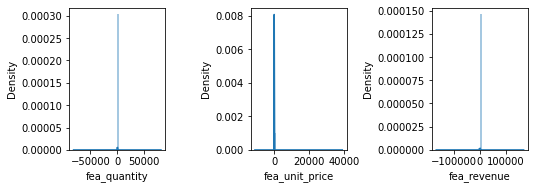

close


In [36]:
# Hiện thị dữ liệu
pre.displotChart(df=data_pre_processing, lst_lientuc=lst_input_number_continious, lst_output=lst_output_continious,a=4,b=6)

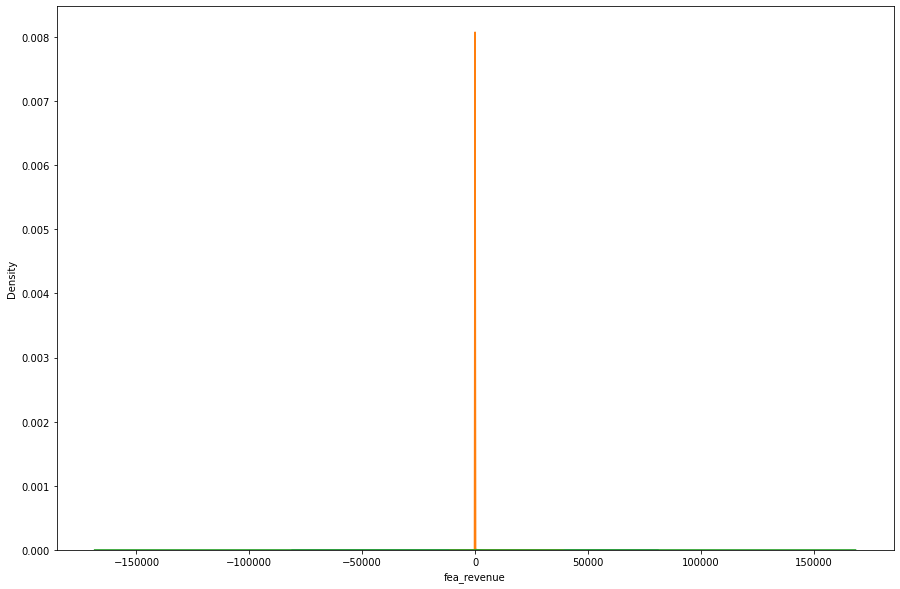

close


In [37]:
pre.subplotsChart(df=data_pre_processing, lst_lientuc=lst_input_number_continious, lst_output=lst_output_continious)

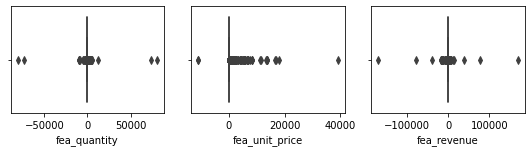

close


In [38]:
pre.boxplotChart(df=data_pre_processing, lst_lientuc=lst_input_number_continious, lst_output=lst_output_continious,a=4,b=6)

In [39]:
pre.filterOutlier(df=data_pre_processing,lst_input=lst_input_number_continious, lst_output=lst_output_continious)

close


,name_feature,IQR,Q1,Q3,cận dưới,cận trên,number_total_oulier,outliers_per_%,count,min,...,range,mean,median,mode,std,var,kurtosis,text_kurtosis,skew,text_skew
0,fea_revenue,13.65,3.75,17.40,2543,43083,45626,8.50,536641,-168469.60,...,336939.20,18.10,9.90,15.00,380.70,144899.20,149741.50,Lệch phải,-1.00,Bẹt
1,fea_quantity,9.00,1.00,10.00,1976,56525,58501,10.90,536641,-80995.00,...,161990.00,9.60,3.00,1.00,219.10,48018.00,118644.40,Lệch phải,-0.30,Bẹt
2,fea_unit_price,2.88,1.25,4.13,2,39448,39450,7.35,536641,-11062.10,...,50032.10,4.60,2.10,1.20,97.20,9454.30,58432.60,Lệch phải,185.60,Nhọn


#### Nhận xét
1. Đối với biến output:
    - Range: chêch lệch quá lớn, dữ liệu lệch phải và nhọn
    - outlier ít
2. Đối với biến input:
    - Range: chêch các thuộc tính quá lớn,  dữ liệu lệch phải và nhọn
    - outlier quá nhiều >= 11%
3. Phải chọn model
    - Đối với dữ liệu thế này cần xem xét chọn model phù hợp hoặc phân cụm thêm cho dữ liệu cho phù hợp hơn

#### 1.1.5. Các chỉ số mô tả thuộc tính output và input của loại dữ liệu phân loại
1. Mức độ tần suất biến phân loại
2. Mức độ cân bằng dữ liệu của các biến phân loại =>xem mức độ các biên, count các phần tử

In [40]:
pre.summaryCategorical(df=data_pre_processing, lst_category_number=lst_input_numbers_categorical , lst_category_object=lst_input_object_categorical, \
    columns = ['feature','Số phân tử'])

- Mô tả biến  fea_year : 2 giá trị
2011    494660
2010     41981
Name: fea_year, dtype: int64
- Mô tả biến  fea_month : 12 giá trị
11    72517
10    56296
9     50932
7     46756
6     45710
8     44504
5     42240
1     39437
3     38273
4     36819
2     33507
12    29650
Name: fea_month, dtype: int64
- Mô tả biến  fea_day : 31 giá trị
12    51570
11    29088
10    23465
17    22618
21    19104
18    18967
20    18909
13    18099
14    17929
23    17607
28    17069
9     16919
24    16719
5     16364
25    16057
22    16014
15    15567
16    15425
7     15331
30    15294
8     14981
6     14809
27    14790
19    13058
1     12850
3     12509
4     12249
29    11821
2     10521
26    10469
31    10469
Name: fea_day, dtype: int64
- Mô tả biến  fea_weekofyear : 52 giá trị
46    20768
47    19568
23    17807
32    15326
45    14922
41    14511
43    14289
19    14120
48    13891
38    13556
42    13463
39    13417
6     13253
36    13127
28    13093
2     11270
50    11061
49    11052
14

,feature,Số phân tử
0,fea_year,2
1,fea_month,12
2,fea_day,31
3,fea_weekofyear,52
4,fea_daily,7
5,fea_customer_id,4373
6,fea_country,38
7,fea_type_invoice,2
8,fea_stock_code,4070
9,fea_type_stock_code,39


In [41]:
data_pre_processing.tail()

,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,fea_type_invoice,fea_stock_code,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue
541904,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,22613,other,PACK OF 20 SPACEBOY NAPKINS,pack of 2 spaceboy napkins,pack of spaceboy napkins,12.00,0.85,10.20
541905,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,22899,other,CHILDREN'S APRON DOLLY GIRL,childrens apron dolly girl,childrens apron dolly girl,6.00,2.10,12.60
541906,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,23254,other,CHILDRENS CUTLERY DOLLY GIRL,childrens cutlery dolly girl,childrens cutlery dolly girl,4.00,4.15,16.60
541907,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,23255,other,CHILDRENS CUTLERY CIRCUS PARADE,childrens cutlery circus parade,childrens cutlery circus parade,4.00,4.15,16.60
541908,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,22138,other,BAKING SET 9 PIECE RETROSPOT,baking setpiece retrospot,baking set piece retrospot,3.00,4.95,14.85


In [42]:
pre.categorical_value_counts(df=data_pre_processing, lst_categorical='fea_country')

close


,fea_country
United Kingdom,490300
Germany,9480
France,8541
EIRE,8184
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1994
Portugal,1510
Australia,1258


### Nhận xét:
- Thuộc tính continious: quá nhiều outlier có thể do giá bán khác nhau
- Dữ liệu đa số lệch phải

### 1.2. Phân tích 2 biến (BI-variable analysis)
1. Mục đích phân tích 2 biến (BI-variable analysis)
    - Phân tích 2 biền làm gì ?
        - Tìm sự liên kết (association) và không liên kết (Disassociation)
            * Hai biến input có độc lập với nhau không ?
            * Hai biến input và output có phụ thuộc lãnh nhau không 
                - Có sự liên kết với nhau không ? 
                - Nếu phú thuộc thì quá tốt với model
            * Thực tế các biến input khó có thể độc lập với nhau 
                - Cần xem mức độ tương quan giữa các biến
            * Các biến input phụ thuộc nhau các ít càng tốt
            * Biến input luôn phải phụ thuộc với biến output thì mới có ý nghĩa
2. Biến liên tục với biến liên tục (Continuous vs Continuous)
    - Dùng biểu đồ phân tán
        * Đó là cách phù hợp để xem mối quan hệ 2 biến
        * Cho thấy mỗi quan hệ là tuyến tính hoặc phi tuyến tính
    - Dùng Correction
        * Tương quan khác nhau giữa -1 đến 1
        * Bé hơn 0.3 tương quan rời rác
        * Từ 0.3 đến 0.6 tương quan
        * Lớn hơn 0.6 tương quan mạnh mẽ
3. Hai biến phân loại (Categorical vs Categorical)
    - Step 1: Dùng two-way table
        - Bắt đầu phân tích mỗi quan hệ bằng cách tạo 2 chiều Count
        - Các dòng category theo các dòng khác nhau
    - Step 2: Stacked column chart - Trực quan hóa 2 cột chồng lên nhau
    - Step 3: Dùng Chi-square
        - Kiểm định 2 biến độc lập hay phụ thuộc
            * Thức đo giá trị thống kê: Statistic >= Critical value: Dữ liệu độc lập, ngược lại là dữ liệu phụ thuộc
            * Theo giá trị p-value: p-value <= alpha: 2 biến độc lập, ngược lại 2 biến phụ thuộc hoặc alpha = 1-prod trong đó thường prod: 0.95
4. Biến liên tục vs biến phân loại (Categorical vs Continuous) => Một trường hợp phức tạp
    - Trực quan hóa dữ liệu bằng boxlot
        * Với số lượng thuộc tính ít, không hiển thị ý nghĩa thống kê
    - Dùng ANOVA - để xem mức độ tương quan: aov_table[aov_table['PR(>F)'] < alpha] => Có tương quan với nhau 
5. Mục đích phân tích để làm gì ?
    - Thứ 1: Phát hiện missing value và outlier
    - Thứ 2: Chọn các thuộc tính categorical, continious phù hợp với bài toán
    - Thứ 3: Xem có thể thực các bước tiếp theo      

#### 1.2.1. Phân tích 2 biến liên tục/ Biến liên tục với biến liên tục (Continuous vs Continuous)
- Dùng biểu đồ phân tán
        * Đó là cách phù hợp để xem mối quan hệ 2 biến
        * Cho thấy mỗi quan hệ là tuyến tính hoặc phi tuyến tính
    - Dùng Correction
        * Tương quan khác nhau giữa -1 đến 1
        * Bé hơn 0.3 tương quan rời rác
        * Từ 0.3 đến 0.6 tương quan
        * Lớn hơn 0.6 tương quan mạnh mẽ
    - Dùng K-best

In [43]:
# Ma trận hệ số tương quan giữa các biến với nhau
pre.corr_continious(df=data_pre_processing, lst_input_continious=lst_input_number_continious, lst_output_continious=lst_output_continious)

close


,fea_revenue,fea_quantity,fea_unit_price
fea_revenue,1.00,0.89,-0.16
fea_quantity,0.89,1.00,-0.00
fea_unit_price,-0.16,-0.00,1.00


In [44]:
# Trực quan hóa dữ liệu
#pre.pairplot_chart(df=data_pre_processing, lst_continious=lst_input_number_continious)

In [45]:
# Trực quan hóa dữ liệu
# pre.pairplot_chart(df=data_pre_processing, lst_continious=lst_output_continious)

In [46]:
# Biến inputs liên tục với biến output liên tục: Dùng để xem mực độ tương quan của biến output và output
# ['amount_billion_new','amount_calculation','amount_calculation_new','price_house_billion']
pre.correlate_output_two_continious(df=data_pre_processing, lst_input_continious=lst_input_number_continious, feature_output_continious='fea_revenue',strong=0.6, correlate=0.3)

close


,correlate,Variable_output,Variable_input,corr
0,strong,fea_revenue,fea_quantity,0.89
0,weak,fea_revenue,fea_unit_price,0.16


In [47]:
pre.correlate_input_two_continious(df=data_pre_processing, lst_input_continious=lst_input_number_continious, choose='strong')

close


,correlate,Variable_input1,Variable_input2,corr


In [48]:
# medium: 2 biến input
pre.correlate_input_two_continious(df=data_pre_processing, lst_input_continious=lst_input_number_continious, choose='medium')

close


,correlate,Variable_input1,Variable_input2,corr


In [49]:
# correlate: 2 biến input
pre.correlate_input_two_continious(df=data_pre_processing, lst_input_continious=lst_input_number_continious, choose='correlate')

close


,correlate,Variable_input1,Variable_input2,corr


In [50]:
# weak: 2 biến input
pre.correlate_input_two_continious(df=data_pre_processing, lst_input_continious=lst_input_number_continious, choose='weak')

close


,correlate,Variable_input1,Variable_input2,corr
0,weak,fea_unit_price,fea_quantity,0.00


#### Nhận xét:
1. Trường hợp đa cộng tuyến
- Output vs input tương quan dữ liệu quá yếu cần xem cách chia như thế nào cho hợp lý
- Loại bỏ những thuộc tính input có tính phụ thuộc với nhau cao như strong and medium

#### 1.2.2. Phân tích biến liên tục/ Biến phân loại (continious & Categorical)
- Step 1: Dùng two-way table
    - Bắt đầu phân tích mỗi quan hệ bằng cách tạo 2 chiều Count
    - Các dòng category theo các dòng khác nhau
- Step 2: Stacked column chart - Trực quan hóa 2 cột chồng lên nhau
- Step 3: Dùng Chi-square
    - Kiểm định 2 biến độc lập hay phụ thuộc
        * Thức đo giá trị thống kê: Statistic >= Critical value: Dữ liệu độc lập, ngược lại là dữ liệu phụ thuộc
        * Theo giá trị p-value: p-value <= alpha: 2 biến độc lập, ngược lại 2 biến phụ thuộc hoặc alpha = 1-prod trong đó thường prod: 0.95

In [51]:
lst_input_numbers_categorical, lst_input_object_categorical, lst_input_number_continious, lst_output_continious

(['fea_year', 'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily'],
 ['fea_customer_id',
  'fea_country',
  'fea_type_invoice',
  'fea_stock_code',
  'fea_type_stock_code',
  'fea_description_1',
  'fea_description_2',
  'fea_description_3'],
 ['fea_quantity', 'fea_unit_price'],
 ['fea_revenue'])

In [52]:
# Dự đoán kiểu dữ liệu của thuộc tính theo các cập bậc input/ output và continious/ categorical
# Biến liên tục
lst_input_number_continious_ = ['fea_quantity', 'fea_unit_price']
# Biến phân loại
lst_input_numbers_categorical_ = ['fea_country', 'fea_type_invoice','fea_type_stock_code']
lst_input_object_categorical_ = ['fea_customer_id',  'fea_type_invoice', 'fea_stock_code', 'fea_description_1', 'fea_description_2','fea_description_3', 'fea_year', 'fea_month', 'fea_day','fea_weekofyear', 'fea_daily']
lst_input_object_text_ = ['fea_invoice_no']
lst_input_date_ = ['fea_invoice_date']
# Biến categorical 
lst_output_categorical_ = []
# Biến liên tục - continious
lst_output_continious_ = ['fea_revenue']

In [53]:
pre.correlate_input_variable_continious_inputCategorical(df=data_pre_processing, lst_categorical=lst_input_numbers_categorical_,\
    lst_continious=lst_input_number_continious_+lst_output_continious_, choose="matrix")

close


,fea_quantity,fea_unit_price,fea_revenue
C(fea_country),0.00,0.00,0.00
C(fea_type_invoice),0.00,0.00,0.00
C(fea_type_stock_code),0.00,0.00,0.00


In [54]:
pre.correlate_input_variable_continious_inputCategorical(df=data_pre_processing, lst_categorical=lst_input_numbers_categorical_,\
     lst_continious=lst_input_number_continious_, choose="matrix")

close


,fea_quantity,fea_unit_price
C(fea_country),0.00,0.00
C(fea_type_invoice),0.00,0.00
C(fea_type_stock_code),0.00,0.00


#### Nhận xét
1. Những thuộc tính phụ thuộc biến output xem thui
2. Xây dựng 1 hàm tốt hơn để phân tích thêm yếu tố này

#### 1.2.2. Biến liên tục vs biến phân loại (Categorical vs categorical)

In [55]:
lst_categorical = lst_input_numbers_categorical + lst_input_object_categorical
pre.correlate_2_variable_categorical(df=data_pre_processing, lst_categorical=lst_categorical, choose="dependent")

close


,Tuong_quan,Variable_input1,Variable_input2
0,Phụ thuộc nhau (reject H0),fea_year,fea_month
1,Phụ thuộc nhau (reject H0),fea_year,fea_day
2,Phụ thuộc nhau (reject H0),fea_year,fea_weekofyear
3,Phụ thuộc nhau (reject H0),fea_year,fea_daily
4,Phụ thuộc nhau (reject H0),fea_year,fea_customer_id
...,...,...,...
72,Phụ thuộc nhau (reject H0),fea_type_stock_code,fea_description_2
73,Phụ thuộc nhau (reject H0),fea_type_stock_code,fea_description_3
74,Phụ thuộc nhau (reject H0),fea_description_1,fea_description_2
75,Phụ thuộc nhau (reject H0),fea_description_1,fea_description_3


#### Nhận xét:
1. Cần loại bỏ những trường hợp phụ thuộc nhau ra với các biến input đa công tuyến

## C. DATA ANALYSIS
- Mục tiêu của việc phân tích này:
    1. Gán nhãn cho dữ liệu
    2. Tìm những thuộc tính tốt cho bài toán
    3. Xây dựng bộ feature cho bài toán

### 1.0. Lựa chọn lại feature cho phù hợp bài toán

In [56]:
data_pre_processing.columns

Index(['fea_invoice_date', 'fea_year', 'fea_month', 'fea_day',
       'fea_weekofyear', 'fea_daily', 'fea_customer_id', 'fea_country',
       'fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2',
       'fea_description_3', 'fea_quantity', 'fea_unit_price', 'fea_revenue'],
      dtype='object')

In [57]:
# Dự đoán kiểu dữ liệu của thuộc tính theo các cập bậc input/ output và continious/ categorical
# Biến liên tục
lst_input_number_continious = ['fea_quantity', 'fea_unit_price']
# Biến phân loại
lst_input_numbers_categorical = ['fea_country', 'fea_type_invoice','fea_type_stock_code']
lst_input_object_categorical = ['fea_customer_id',  'fea_stock_code', 'fea_description_1', 'fea_description_2','fea_description_3', 'fea_year', 'fea_month', 'fea_day','fea_weekofyear', 'fea_daily']
lst_input_object_text = ['fea_invoice_no']
lst_input_date = ['fea_invoice_date']
# Biến categorical 
lst_output_categorical = []
# Biến liên tục - continious
lst_output_continious = ['fea_revenue']

In [58]:
# Trường hợp 1: Lấy toán bồ dữ liệu
lst_variable = lst_output_continious + lst_input_date + lst_input_object_categorical + lst_input_numbers_categorical + lst_input_number_continious +lst_input_object_text
data_analysis_all = data_pre_processing[lst_variable]

In [59]:
data_analysis_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fea_revenue          536641 non-null  float64       
 1   fea_invoice_date     536641 non-null  datetime64[ns]
 2   fea_customer_id      536641 non-null  object        
 3   fea_stock_code       536641 non-null  object        
 4   fea_description_1    536641 non-null  object        
 5   fea_description_2    536641 non-null  object        
 6   fea_description_3    536641 non-null  object        
 7   fea_year             536641 non-null  int32         
 8   fea_month            536641 non-null  int32         
 9   fea_day              536641 non-null  int32         
 10  fea_weekofyear       536641 non-null  int32         
 11  fea_daily            536641 non-null  int32         
 12  fea_country          536641 non-null  object        
 13  fea_type_invoi

### 1.1. Phân tích biến target variable

In [60]:
# Chọn thuộc tính
features_choose = []
y = 'fea_revenue'

#### 1.1.1. Thuộc tính target
- Biến Y là: fea_average_price
- Biến X là: xem các biến còn lại

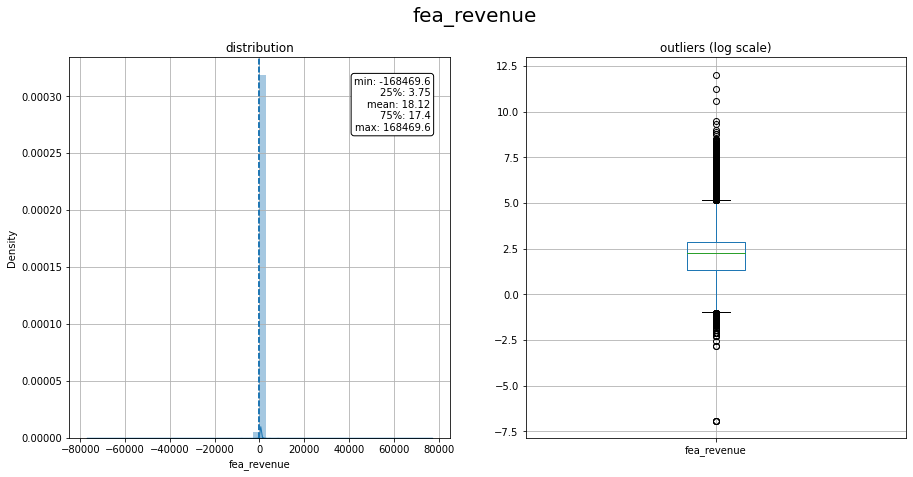

In [61]:
# Hàm xem thực hiện tính outlier của biến y => Có rất nhiều giá trị outlier ở phần trên
pre.freqdist_plot(data_analysis_all, y, box_logscale=True, figsize=(15,7))

In [62]:
features_choose.append('fea_revenue')

#### Nhận xét:
- Biến fea_average_price các giá trị chêch lệch lớn giữa min, max, và mean
- Outler trên dưới đều cao sau khi log

#### 1.1.2. Thuộc tính input

In [63]:
# Column input
data_analysis_all.columns

Index(['fea_revenue', 'fea_invoice_date', 'fea_customer_id', 'fea_stock_code',
       'fea_description_1', 'fea_description_2', 'fea_description_3',
       'fea_year', 'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily',
       'fea_country', 'fea_type_invoice', 'fea_type_stock_code',
       'fea_quantity', 'fea_unit_price', 'fea_invoice_no'],
      dtype='object')

#### 1.1.2.1. fea_date

--- WARNING: Factorizing 4373 labels of fea_customer_id ---
--- WARNING: Factorizing 4070 labels of fea_stock_code ---
--- WARNING: Factorizing 4224 labels of fea_description_1 ---
--- WARNING: Factorizing 4159 labels of fea_description_2 ---
--- WARNING: Factorizing 4084 labels of fea_description_3 ---
--- WARNING: Factorizing 38 labels of fea_country ---
--- WARNING: Factorizing 2 labels of fea_type_invoice ---
--- WARNING: Factorizing 39 labels of fea_type_stock_code ---
--- WARNING: Factorizing 25900 labels of fea_invoice_no ---


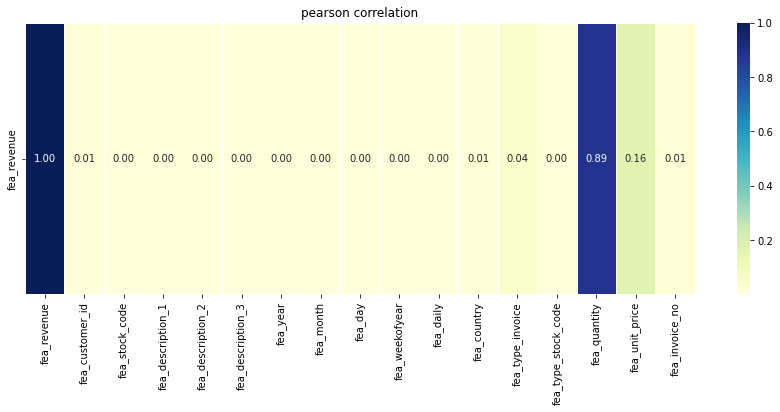

In [64]:
corr = pre.corr_matrix(data_analysis_all, method="pearson", negative=False, lst_filters=[y], figsize=(15,5))

#### Nhận xét: 
- Có 2 dữ liệu chưa gán nhãn
- Chỉ có feature fea_type: mới có dữ liệu gần correct với dữ liệu

##### 1.1.2. Chọn thuộc tính input


##### 1.1.2.1. Chọn thuộc tính input categorical

In [65]:
lst_input_numbers_categorical = ['fea_country', 'fea_type_invoice','fea_type_stock_code']

In [66]:
pre.utils_recognize_type(dtf=data_analysis_all, col=y,max_cat=20)

'num'

#### Nhận xét:
- Biến input là biến continious

##### 1.1.2.1.1. fea_country

In [67]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_country',max_cat=20)

'cat'

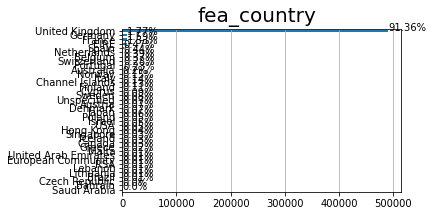

(Text(0.5, 0.98, 'fea_country'), None)

In [68]:
pre.freqdist_plot(data_analysis_all, "fea_country", figsize=(5,3))

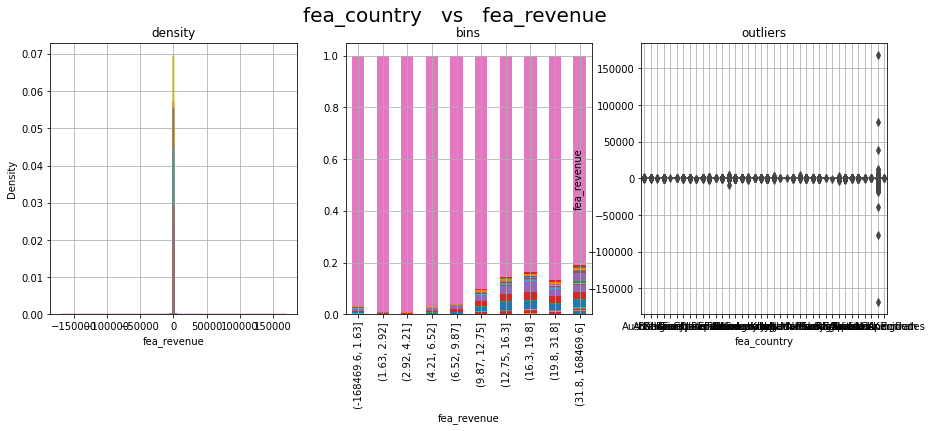

In [69]:
pre.bivariate_plot(data_analysis_all, x="fea_country", y=y, figsize=(15,5))

In [70]:
#-> OverallQual is Predctive: the higher the quality the higher the price.
features_choose.append("fea_country")

##### Nhận xét:
- Doanh số tập trung chủ yếu vào United Kingdom đên 99%

##### 1.1.2.1.2. fea_type_invoice

In [71]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_type_invoice',max_cat=20)

'cat'

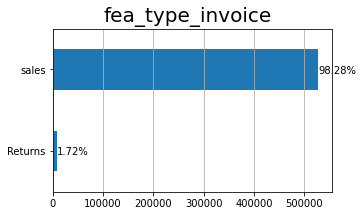

(Text(0.5, 0.98, 'fea_type_invoice'), None)

In [72]:
pre.freqdist_plot(data_analysis_all, "fea_type_invoice", figsize=(5,3))

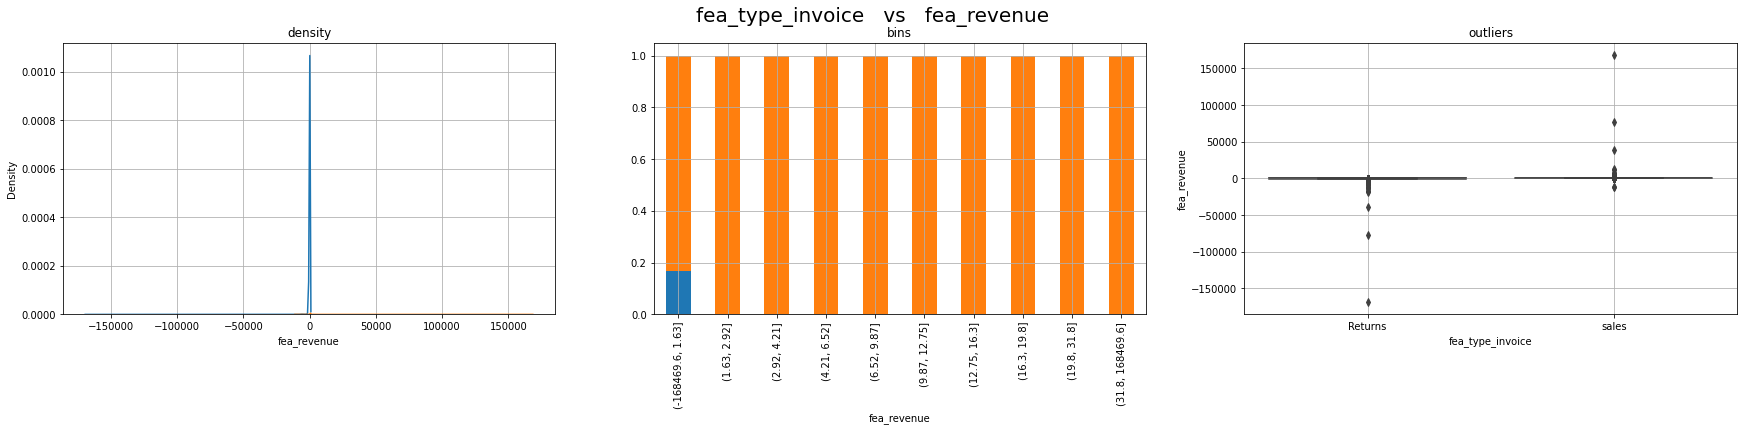

In [73]:
pre.bivariate_plot(data_analysis_all, x="fea_type_invoice", y=y, figsize=(30,5))

In [74]:
#-> OverallQual is Predctive: the higher the quality the higher the price.
features_choose.append("fea_type_invoice")

##### Nhận xét: 
- Chủ yếu là bán hàng tỉ lệ trả hàng, khuyến mãi, ... chiếm 2%

##### 1.1.2.1.3. fea_type_stock_code

In [75]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_type_stock_code',max_cat=20)

'cat'

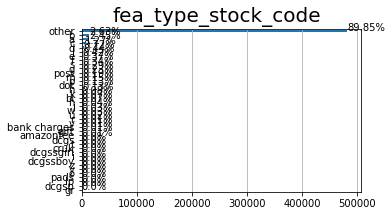

(Text(0.5, 0.98, 'fea_type_stock_code'), None)

In [76]:
pre.freqdist_plot(data_analysis_all, "fea_type_stock_code", figsize=(5,3))

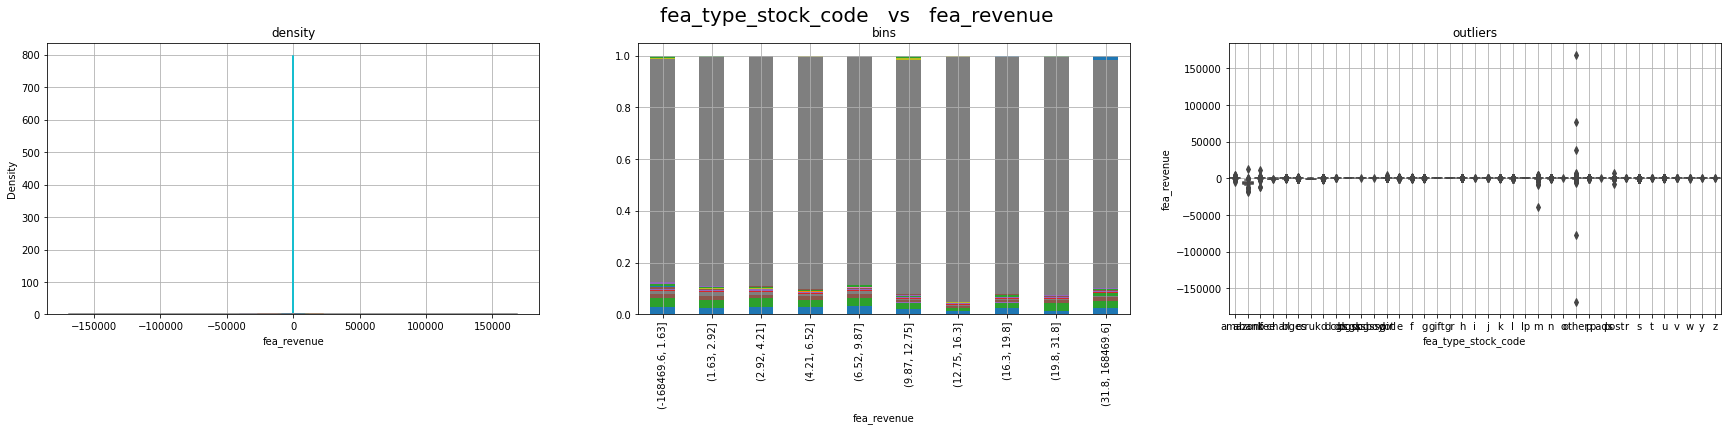

In [77]:
pre.bivariate_plot(data_analysis_all, x="fea_type_stock_code", y=y, figsize=(30,5))

##### 1.1.2.1. Chọn thuộc tính input continious

In [78]:
lst_input_number_continious = ['fea_quantity', 'fea_unit_price', 'fea_customer_id',  'fea_stock_code', 'fea_description_1', 'fea_description_2',
'fea_description_3', 'fea_year', 'fea_month', 'fea_day','fea_weekofyear', 'fea_daily', 'fea_invoice_no', 'fea_invoice_date']

##### 1.1.2.1.1. fea_quantity

In [79]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_quantity',max_cat=20)

'num'

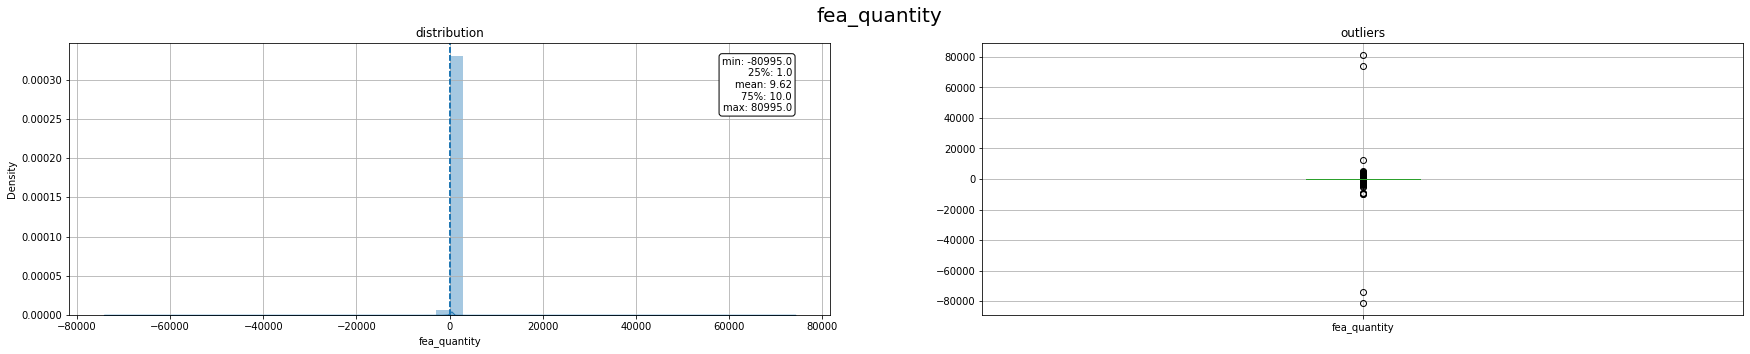

In [80]:
pre.freqdist_plot(data_analysis_all, "fea_quantity", figsize=(30,5))

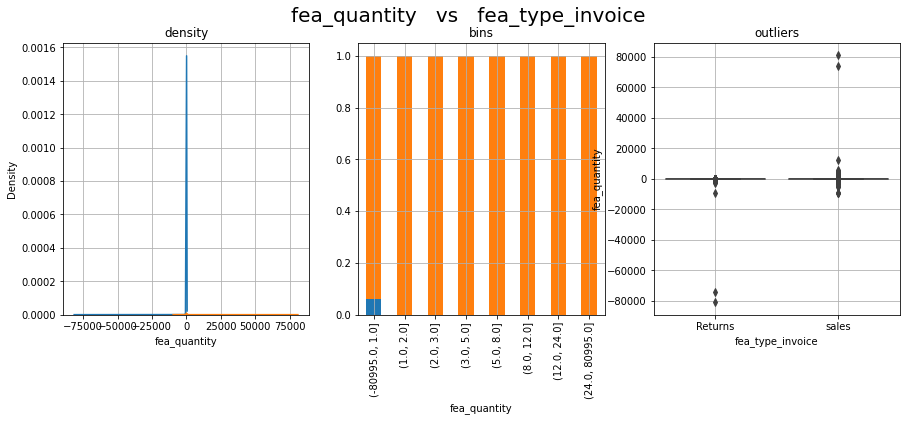

In [81]:
pre.bivariate_plot(data_analysis_all, x="fea_quantity", y='fea_type_invoice', figsize=(15,5))

In [82]:
features_choose.append('fea_quantity')

##### Nhận xét:
- Những khu vực khác nhau sẽ có sản lượng bơ khác nhau cho từng khu vực
- Cho nên cần phải phân tách lượng bơ từng khu vức thế nào?

##### 1.1.2.1.2. fea_unit_price

In [83]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_unit_price',max_cat=20)

'num'

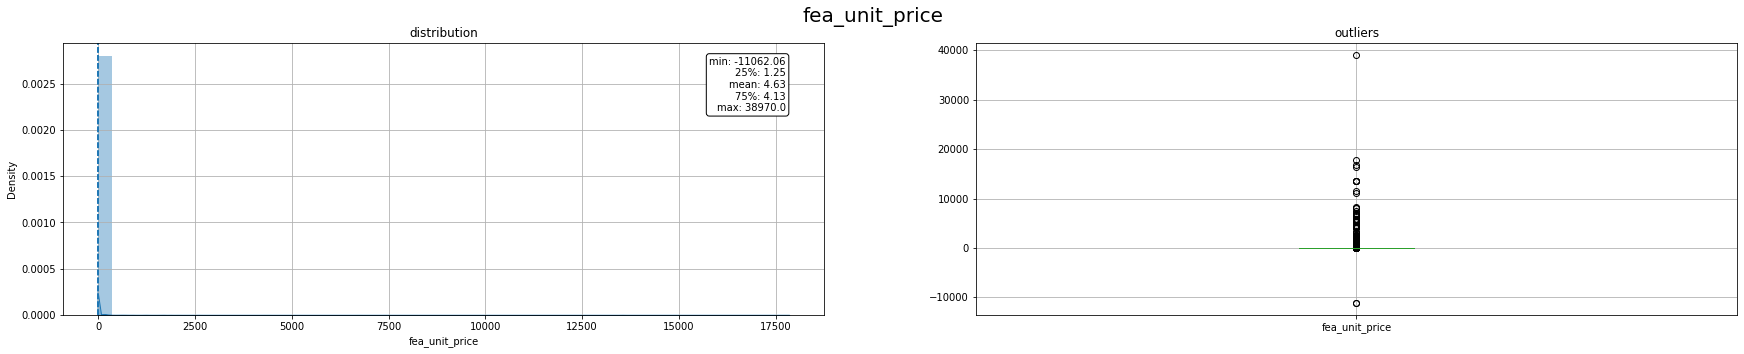

In [84]:
pre.freqdist_plot(data_analysis_all, "fea_unit_price", figsize=(30,5))

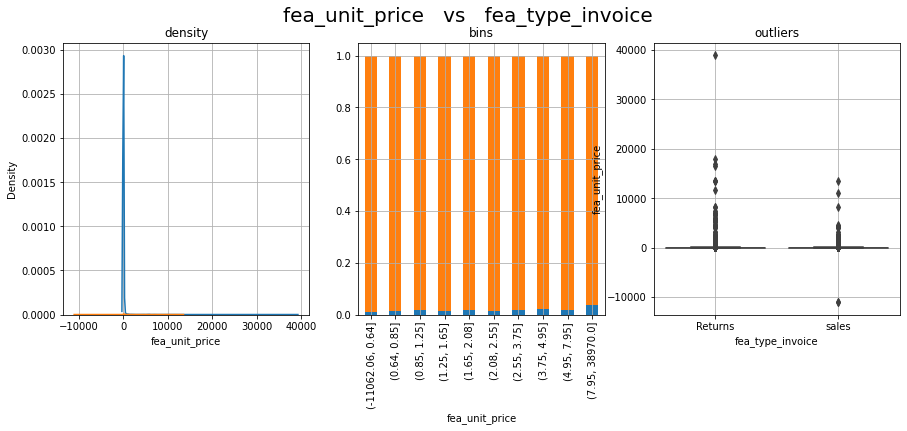

In [85]:
pre.bivariate_plot(data_analysis_all, x="fea_unit_price", y='fea_type_invoice', figsize=(15,5))

In [86]:
features_choose.append('fea_unit_price')

##### Nhận xét:
- Outlier quá nhiều cần xem lại outler từng vùng và từng type

##### 1.1.2.1.3. fea_year

In [87]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_year',max_cat=3)

'cat'

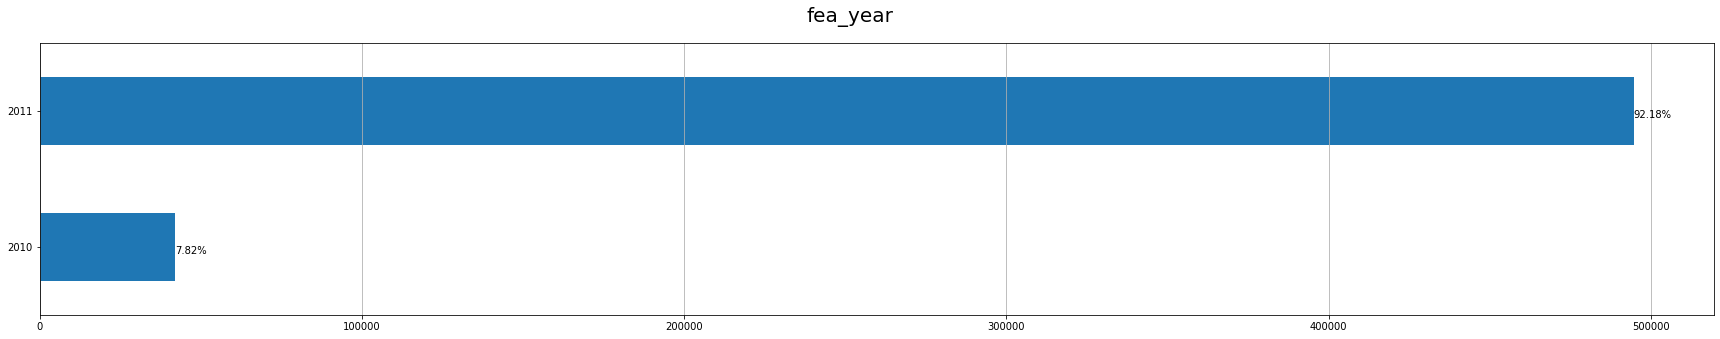

(Text(0.5, 0.98, 'fea_year'), None)

In [88]:
pre.freqdist_plot(data_analysis_all, "fea_year", figsize=(30,5))

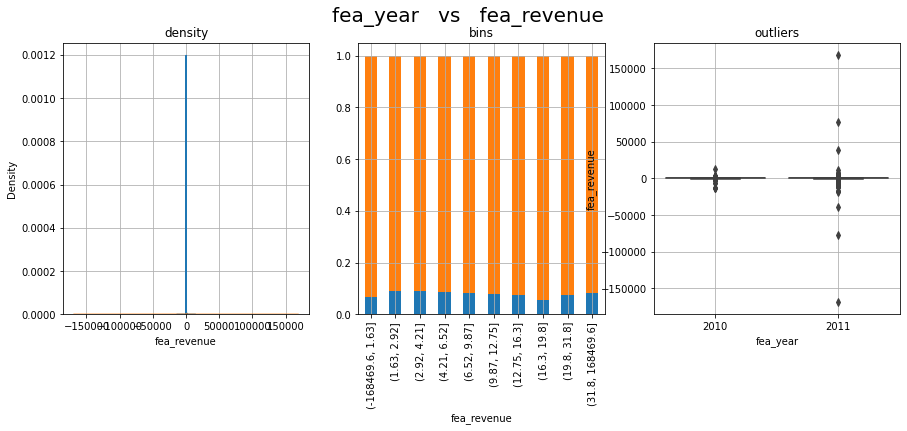

In [89]:
pre.bivariate_plot(data_analysis_all, x="fea_year", y=y, figsize=(15,5), max_cat=3)


##### 1.1.2.1.4. fea_month

In [90]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_month',max_cat=11)


'num'

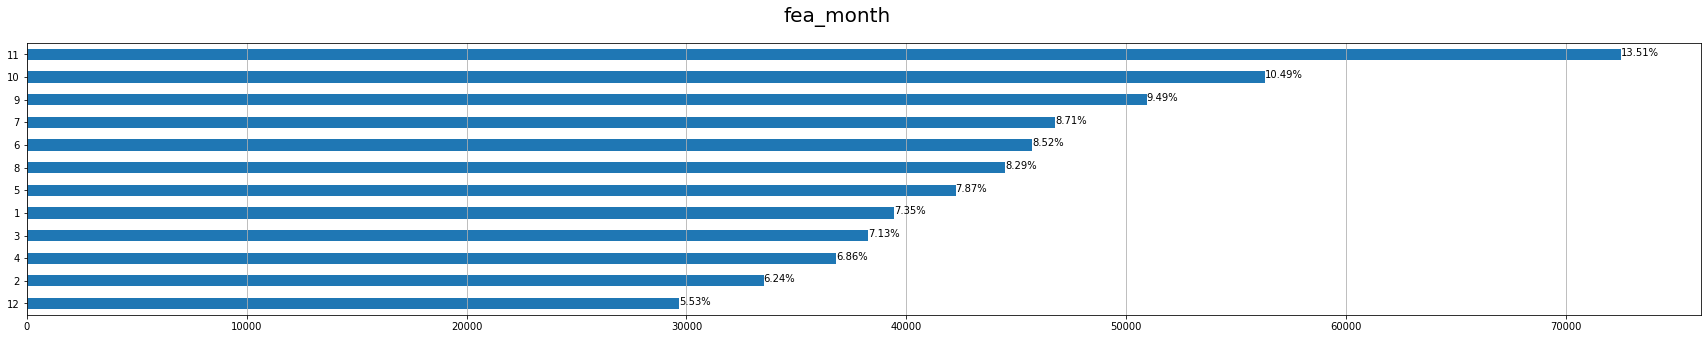

(Text(0.5, 0.98, 'fea_month'), None)

In [91]:
pre.freqdist_plot(data_analysis_all, "fea_month", figsize=(30,5))


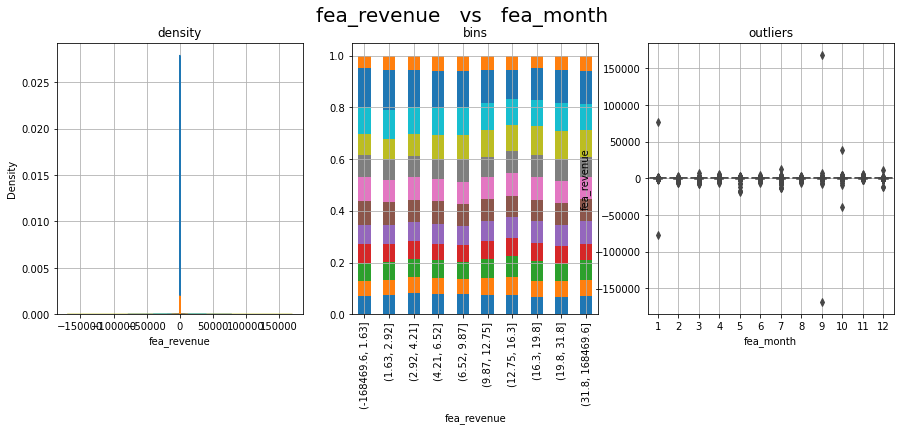

In [92]:
pre.bivariate_plot(data_analysis_all, x=y, y='fea_month', figsize=(15,5), max_cat=20)


##### 1.1.2.1.5. fea_day

In [93]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_day',max_cat=32)


'cat'

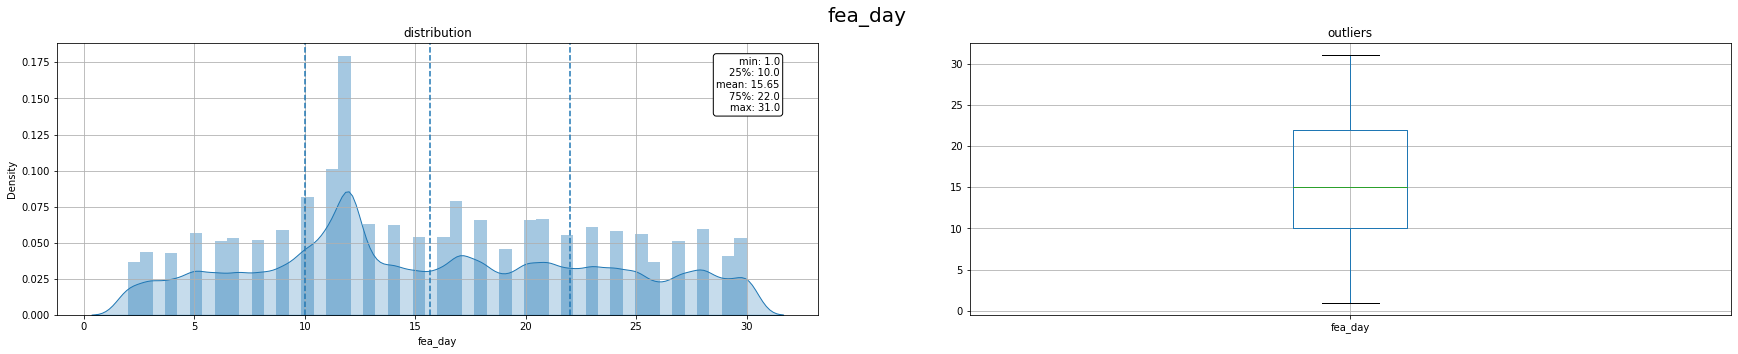

In [94]:
pre.freqdist_plot(data_analysis_all, "fea_day", figsize=(30,5))


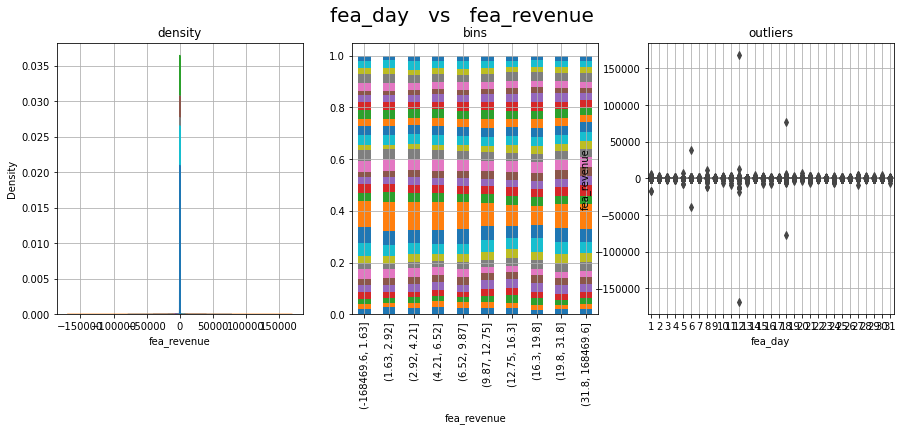

In [95]:
pre.bivariate_plot(data_analysis_all, x="fea_day", y=y, figsize=(15,5),max_cat=32)


##### 1.1.2.1.6. fea_weekofyear

In [96]:
pre.utils_recognize_type(dtf=data_analysis_all, col='fea_weekofyear',max_cat=52)


'num'

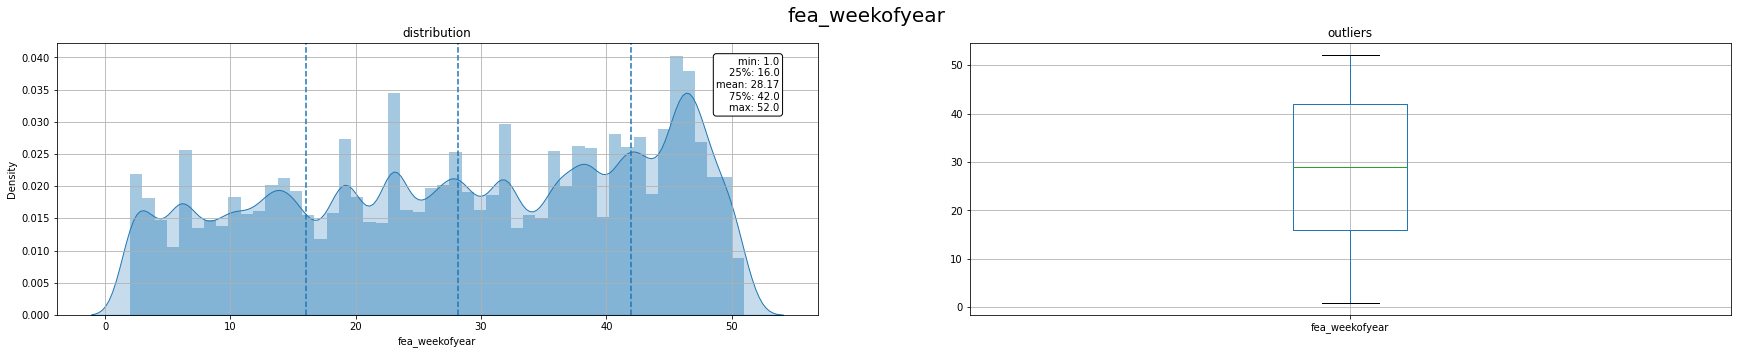

In [97]:
pre.freqdist_plot(data_analysis_all, "fea_weekofyear", figsize=(30,5))


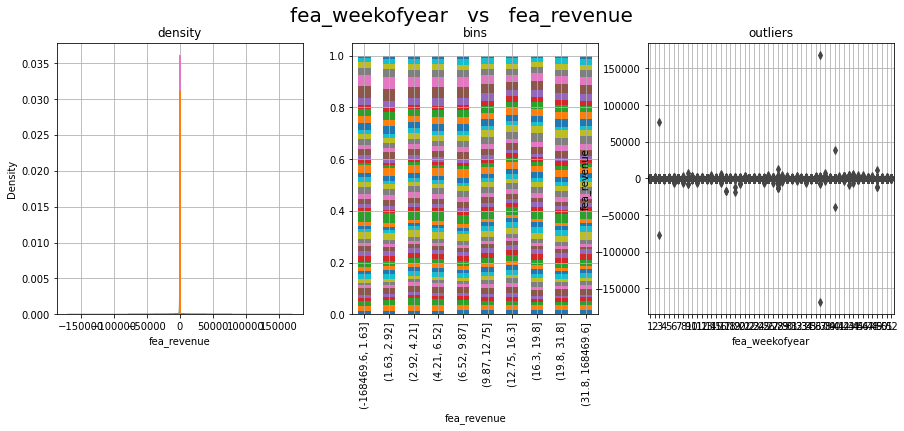

In [98]:
pre.bivariate_plot(data_analysis_all, x="fea_weekofyear", y=y, figsize=(15,5), max_cat=54)


#### Nhận xét:
- Chủ yếu bán hàng vào tháng 11 => Tháng khuyến mãi và tháng noel

### Nhận xét tổng:
- Thuộc tính type:
    - organic: Hữu cơ thì có tính chất biến đống ít hơn
    - conventional: Thông thường giá thường biến động rất mạnh, outlier nhiều
- Cần gán nhãn thuộc tính
- Xem tính đa công tuyến và k-best như thế nào

### 1.2. Preprocessing
###### To do:
- Dataset partitioning
- Resample
- Treat missings
- Encode categorical data
- Scaling
- Preprocess Test data

In [99]:
feature_choose_1 = ['fea_revenue','fea_invoice_date', 'fea_year', 'fea_month', 'fea_day',
       'fea_weekofyear', 'fea_daily', 'fea_customer_id', 'fea_country',
       'fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2',
       'fea_description_3', 'fea_quantity', 'fea_unit_price' ]
y = 'fea_revenue'

In [100]:
data_analysis_final = data_analysis_all[feature_choose_1]
data_analysis_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fea_revenue          536641 non-null  float64       
 1   fea_invoice_date     536641 non-null  datetime64[ns]
 2   fea_year             536641 non-null  int32         
 3   fea_month            536641 non-null  int32         
 4   fea_day              536641 non-null  int32         
 5   fea_weekofyear       536641 non-null  int32         
 6   fea_daily            536641 non-null  int32         
 7   fea_customer_id      536641 non-null  object        
 8   fea_country          536641 non-null  object        
 9   fea_invoice_no       536641 non-null  object        
 10  fea_type_invoice     536641 non-null  object        
 11  fea_stock_code       536641 non-null  object        
 12  fea_type_stock_code  536641 non-null  object        
 13  fea_descriptio

In [101]:
check = pre.data_preprocessing(data_analysis_final, y=y, task="regression")

--- check missing ---
   OK: No missing
--- check categorical data ---
--- split train/test ---
   OK: step skipped
--- scaling ---
   OK: step skipped


#### 1.2.1. Phân vụng dữ liệu - Partitioning

In [102]:
dtf_train, dtf_test = pre.dtf_partitioning(data_analysis_final, y=y, test_size=0.3, shuffle=False)

X_train shape: (375648, 17) | X_test shape: (160993, 17)
y_train mean: 18.51 | y_test mean: 17.23
18 features: ['fea_invoice_date', 'fea_year', 'fea_month', 'fea_day', 'fea_weekofyear', 'fea_daily', 'fea_customer_id', 'fea_country', 'fea_invoice_no', 'fea_type_invoice', 'fea_stock_code', 'fea_type_stock_code', 'fea_description_1', 'fea_description_2', 'fea_description_3', 'fea_quantity', 'fea_unit_price']


#### Nhận xét:
- Dữ liệu test và dữ liệu train có sự chêch lệch quá lớn

#### 1.2.2. Missing values
- Dữ liệu không có missing value

#### 1.2.3. Categorical Encoding

In [103]:
data_analysis_final = pre.add_dummies(data_analysis_final, x="fea_country", dropx=True)
data_analysis_final

      fea_country  fea_country_Austria  fea_country_Bahrain  \
0  United Kingdom                    0                    0   
1  United Kingdom                    0                    0   
2  United Kingdom                    0                    0   
3  United Kingdom                    0                    0   
4  United Kingdom                    0                    0   

   fea_country_Belgium  fea_country_Brazil  fea_country_Canada  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   

   fea_country_Channel Islands  fea_country_Cyprus  \
0                            0                   0   
1                            0                   0   
2                            0                   0   
3       

,fea_revenue,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_invoice_no,fea_type_invoice,...,fea_country_RSA,fea_country_Saudi Arabia,fea_country_Singapore,fea_country_Spain,fea_country_Sweden,fea_country_Switzerland,fea_country_USA,fea_country_United Arab Emirates,fea_country_United Kingdom,fea_country_Unspecified
0,15.30,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,536365,sales,...,0,0,0,0,0,0,0,0,1,0
1,20.34,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,536365,sales,...,0,0,0,0,0,0,0,0,1,0
2,22.00,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,536365,sales,...,0,0,0,0,0,0,0,0,1,0
3,20.34,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,536365,sales,...,0,0,0,0,0,0,0,0,1,0
4,20.34,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,536365,sales,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,10.20,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,581587,sales,...,0,0,0,0,0,0,0,0,0,0
541905,12.60,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,581587,sales,...,0,0,0,0,0,0,0,0,0,0
541906,16.60,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,581587,sales,...,0,0,0,0,0,0,0,0,0,0
541907,16.60,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,581587,sales,...,0,0,0,0,0,0,0,0,0,0


In [104]:
data_analysis_final = pre.add_dummies(data_analysis_final, x="fea_type_invoice", dropx=True)
data_analysis_final

  fea_type_invoice  fea_type_invoice_sales
0            sales                       1
1            sales                       1
2            sales                       1
3            sales                       1
4            sales                       1


,fea_revenue,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_invoice_no,fea_stock_code,...,fea_country_Saudi Arabia,fea_country_Singapore,fea_country_Spain,fea_country_Sweden,fea_country_Switzerland,fea_country_USA,fea_country_United Arab Emirates,fea_country_United Kingdom,fea_country_Unspecified,fea_type_invoice_sales
0,15.30,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,536365,85123A,...,0,0,0,0,0,0,0,1,0,1
1,20.34,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,536365,71053,...,0,0,0,0,0,0,0,1,0,1
2,22.00,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,536365,84406B,...,0,0,0,0,0,0,0,1,0,1
3,20.34,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,536365,84029G,...,0,0,0,0,0,0,0,1,0,1
4,20.34,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,536365,84029E,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,10.20,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,581587,22613,...,0,0,0,0,0,0,0,0,0,1
541905,12.60,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,581587,22899,...,0,0,0,0,0,0,0,0,0,1
541906,16.60,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,581587,23254,...,0,0,0,0,0,0,0,0,0,1
541907,16.60,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,581587,23255,...,0,0,0,0,0,0,0,0,0,1


#### 1.2.3. Scaler

In [105]:
#scalerX = pre.RobustScaler(quantile_range=(25.0, 75.0))
#scalerY = pre.RobustScaler(quantile_range=(25.0, 75.0))

In [106]:
#data_analysis_final, scalerX, scalerY = pre.scaling(data_analysis_final, y="fea_average_price", scalerX=scalerX, scalerY=scalerY, task="regression")

In [107]:
# Xem lại dữ liệu sắp xếp là category hay continious
test_df = data_analysis_final.drop(columns=['fea_invoice_date'])
test_df
pre.df_overview(df=test_df, choose="dataframe", columns = ['Feature', 'Type_Feature', 'NAS', 'Check_data'])

Shape: (536641, 53)
-----------------


,Feature,Type_Feature,NAS,Check_data
0,fea_revenue,Continious,Nas: 0(0%),Min-Max: (-168469)-(168469)
1,fea_year,categorical,Nas: 0(0%),Categories: 2
2,fea_month,categorical,Nas: 0(0%),Categories: 12
3,fea_day,Continious,Nas: 0(0%),Min-Max: (1)-(31)
4,fea_weekofyear,Continious,Nas: 0(0%),Min-Max: (1)-(52)
5,fea_daily,categorical,Nas: 0(0%),Categories: 7
6,fea_customer_id,categorical,Nas: 0(0%),Categories: 4373
7,fea_invoice_no,categorical,Nas: 0(0%),Categories: 25900
8,fea_stock_code,categorical,Nas: 0(0%),Categories: 4070
9,fea_type_stock_code,categorical,Nas: 0(0%),Categories: 39


# Step 3.0 Phân tích dữ liệu theo 1 hướng mới

## A. Xem mối quan hệ giữa các biến

In [108]:
data_pre_processing.columns

Index(['fea_invoice_date', 'fea_year', 'fea_month', 'fea_day',
       'fea_weekofyear', 'fea_daily', 'fea_customer_id', 'fea_country',
       'fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2',
       'fea_description_3', 'fea_quantity', 'fea_unit_price', 'fea_revenue'],
      dtype='object')

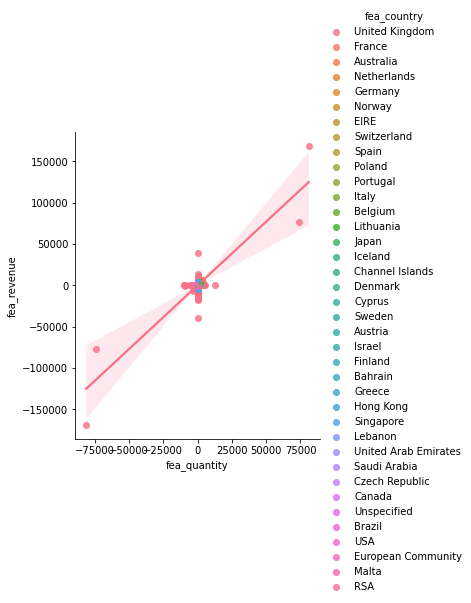

In [109]:
# Xem mức độ tương quan giá giữa các loại bơ với biến sản lượng
pre.corr_lmplot(df=data_pre_processing, varable_continious_x='fea_quantity', varable_continious_y='fea_revenue', variable_categorical='fea_country')

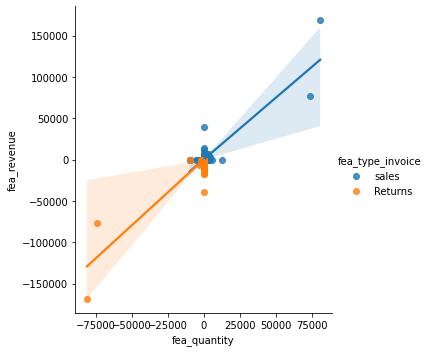

In [110]:
# Xem mức độ tương quan giá giữa các loại bơ với biến sản lượng
pre.corr_lmplot(df=data_pre_processing, varable_continious_x='fea_quantity', varable_continious_y='fea_revenue', variable_categorical='fea_type_invoice')

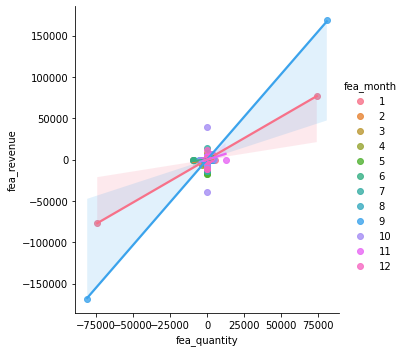

In [111]:
# Xem mức độ tương quan giá giữa các loại bơ với biến sản lượng
pre.corr_lmplot(df=data_pre_processing, varable_continious_x='fea_quantity', varable_continious_y='fea_revenue', variable_categorical='fea_month')

#### Nhận xét:
- Doanh nghiệp tăng từ năm 2010 đến năm 2011 => Tăng lên nhiều so với năm 2010 đến 1200%
- Doanh thu UK: chiếm 84%, chi phí returns: chiếm 90% lượng con lại
- Doanh số không có customerID: other chiếm 18.8% doanh số, chi phí returns lại là: 33,7%

#### Đề xuất
- Nên lấy dữ liệu của UK để phân loại khách hàng cho vùng này để duy trì lượng bán hàng ổn định tại đây

### XUẤT DỮ LIỆU

data_pre_processing.info()

In [112]:
data_pre_processing.to_csv('data_analysis/online_retail_data_analysis.csv')